# Model building for Vehicle Resale Value Prediction

## Importing the libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns

%matplotlib inline

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

## Importing the clean dataset

In [2]:
dataset=pd.read_csv('ML_data.csv',encoding='cp1252')
dataset

,Unnamed: 0,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
0,1,coupe,2011.0,manuell,190.0,125000,5.0,diesel,audi,yes,18300.0
1,3,kleinwagen,2001.0,manuell,75.0,150000,6.0,benzin,volkswagen,no,1500.0
2,4,kleinwagen,2008.0,manuell,69.0,90000,7.0,diesel,skoda,no,3600.0
3,5,limousine,1995.0,manuell,102.0,150000,10.0,benzin,bmw,yes,650.0
4,6,cabrio,2004.0,manuell,109.0,150000,8.0,benzin,peugeot,no,2200.0
...,...,...,...,...,...,...,...,...,...,...,...
241755,371529,kombi,2005.0,manuell,3.0,150000,5.0,diesel,bmw,no,3999.0
241756,371531,limousine,2004.0,manuell,225.0,150000,5.0,benzin,seat,yes,3200.0
241757,371532,bus,2000.0,manuell,0.0,150000,3.0,benzin,opel,no,1150.0
241758,371535,cabrio,2000.0,automatic,101.0,125000,3.0,benzin,smart,no,1199.0


## Seperating independent and dependent variables

In [3]:
x=dataset.iloc[:,1:-1].values
x

array([['coupe', 2011.0, 'manuell', ..., 'diesel', 'audi', 'yes'],
       ['kleinwagen', 2001.0, 'manuell', ..., 'benzin', 'volkswagen',
        'no'],
       ['kleinwagen', 2008.0, 'manuell', ..., 'diesel', 'skoda', 'no'],
       ...,
       ['bus', 2000.0, 'manuell', ..., 'benzin', 'opel', 'no'],
       ['cabrio', 2000.0, 'automatic', ..., 'benzin', 'smart', 'no'],
       ['bus', 1996.0, 'manuell', ..., 'diesel', 'volkswagen', 'no']],
      dtype=object)

In [4]:
x.shape

(241760, 9)

In [5]:
y=dataset.iloc[:,-1].values
y

array([18300.,  1500.,  3600., ...,  1150.,  1199.,  9200.])

In [6]:
y.shape

(241760,)

In [7]:
x[0]

array(['coupe', 2011.0, 'manuell', 190.0, 125000, 5.0, 'diesel', 'audi',
       'yes'], dtype=object)

## applying OneHotEncoding and LabelEncoding

In [8]:
ct=ColumnTransformer([('on',OneHotEncoder(),[0])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 'diesel', 'audi', 'yes'],
       [0.0, 0.0, 0.0, ..., 'benzin', 'volkswagen', 'no'],
       [0.0, 0.0, 0.0, ..., 'diesel', 'skoda', 'no'],
       ...,
       [0.0, 1.0, 0.0, ..., 'benzin', 'opel', 'no'],
       [0.0, 0.0, 1.0, ..., 'benzin', 'smart', 'no'],
       [0.0, 1.0, 0.0, ..., 'diesel', 'volkswagen', 'no']], dtype=object)

In [9]:
import joblib
joblib.dump(ct,'transform')

['transform']

In [10]:
x=x[:,1:]
x.shape

(241760, 15)

In [11]:
x[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2011.0, 'manuell', 190.0,
       125000, 5.0, 'diesel', 'audi', 'yes'], dtype=object)

In [12]:
ct=ColumnTransformer([('on',OneHotEncoder(),[8])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 'diesel', 'audi', 'yes'],
       [0.0, 1.0, 0.0, ..., 'benzin', 'volkswagen', 'no'],
       [0.0, 1.0, 0.0, ..., 'diesel', 'skoda', 'no'],
       ...,
       [0.0, 1.0, 1.0, ..., 'benzin', 'opel', 'no'],
       [1.0, 0.0, 0.0, ..., 'benzin', 'smart', 'no'],
       [0.0, 1.0, 1.0, ..., 'diesel', 'volkswagen', 'no']], dtype=object)

In [13]:
joblib.dump(ct,'transform1')

['transform1']

In [14]:
x.shape

(241760, 16)

In [15]:
x[0]

array([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2011.0, 190.0, 125000,
       5.0, 'diesel', 'audi', 'yes'], dtype=object)

In [16]:
ct=ColumnTransformer([('on',OneHotEncoder(),[13])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 5.0, 'audi', 'yes'],
       [0.0, 1.0, 0.0, ..., 6.0, 'volkswagen', 'no'],
       [0.0, 0.0, 0.0, ..., 7.0, 'skoda', 'no'],
       ...,
       [0.0, 1.0, 0.0, ..., 3.0, 'opel', 'no'],
       [0.0, 1.0, 0.0, ..., 3.0, 'smart', 'no'],
       [0.0, 0.0, 0.0, ..., 3.0, 'volkswagen', 'no']], dtype=object)

In [17]:
joblib.dump(ct,'transform2')

['transform2']

In [18]:
x=x[:,1:]
x.shape

(241760, 21)

In [19]:
x[0]

array([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 2011.0, 190.0, 125000, 5.0, 'audi', 'yes'], dtype=object)

In [20]:
ct=ColumnTransformer([('on',OneHotEncoder(),[19])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 125000, 5.0, 'yes'],
       [0.0, 0.0, 0.0, ..., 150000, 6.0, 'no'],
       [0.0, 0.0, 0.0, ..., 90000, 7.0, 'no'],
       ...,
       [0.0, 0.0, 0.0, ..., 150000, 3.0, 'no'],
       [0.0, 0.0, 0.0, ..., 125000, 3.0, 'no'],
       [0.0, 0.0, 0.0, ..., 150000, 3.0, 'no']], dtype=object)

In [21]:
joblib.dump(ct,'transform3')

['transform3']

In [22]:
x=x[:,1:]
x.shape

(241760, 59)

In [23]:
x[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 2011.0, 190.0, 125000, 5.0, 'yes'], dtype=object)

In [24]:
ct=ColumnTransformer([('on',OneHotEncoder(),[-1])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 1.0, ..., 190.0, 125000, 5.0],
       [1.0, 0.0, 0.0, ..., 75.0, 150000, 6.0],
       [1.0, 0.0, 0.0, ..., 69.0, 90000, 7.0],
       ...,
       [1.0, 0.0, 0.0, ..., 0.0, 150000, 3.0],
       [1.0, 0.0, 0.0, ..., 101.0, 125000, 3.0],
       [1.0, 0.0, 0.0, ..., 102.0, 150000, 3.0]], dtype=object)

In [25]:
joblib.dump(ct,'transform4')

['transform4']

In [26]:
x.shape

(241760, 60)

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-2.75280158,  2.75280158,  3.28503351, ...,  1.50823414,
        -0.07598676, -0.33452408],
       [ 0.36326628, -0.36326628, -0.3044109 , ..., -0.76265537,
         0.60459088, -0.04797169],
       [ 0.36326628, -0.36326628, -0.3044109 , ..., -0.88113656,
        -1.02879547,  0.23858071],
       ...,
       [ 0.36326628, -0.36326628, -0.3044109 , ..., -2.24367027,
         0.60459088, -0.90762887],
       [ 0.36326628, -0.36326628, -0.3044109 , ..., -0.24923687,
        -0.07598676, -0.90762887],
       [ 0.36326628, -0.36326628, -0.3044109 , ..., -0.22949001,
         0.60459088, -0.90762887]])

In [28]:
x[0]

array([-2.75280158,  2.75280158,  3.28503351, -0.34662838, -0.06955563,
       -0.06460935, -0.1238794 , -0.05510891, -0.03813088, -0.04673981,
       -0.16367964, -0.27544652, -0.09038403, -0.10797302, -0.03374592,
       -0.04351878, -0.08926093, -0.02328419, -0.03536573, -0.03893833,
       -0.12949168, -0.31501407, -0.10519435, -0.0925907 , -0.12016085,
       -0.34958584, -0.18583037, -0.03300061, -0.2265546 , -0.03405167,
       -0.04055645, -0.14398062, -0.13621457, -0.11973505, -0.06550701,
       -0.04566085, -0.08427656, -0.12348295, -0.02415706, -0.5200659 ,
       -0.10009145, -1.39270141, -0.04375666,  1.4522443 , -0.01652491,
       -0.0283389 , -0.12437759, -0.49027273,  0.49027273, -0.33033017,
       -0.26217687,  4.60591608, -0.57505767, -0.51579471, -0.63741095,
       -0.19677395,  1.45529469,  1.50823414, -0.07598676, -0.33452408])

## Splitting Data Into Train And Test

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

### Training, Testing and Evaluation of Model Using Decision Tree Regressor, Multi Linear Regression and Random Forest Regressor

## Multi Linear Regression:

In [30]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()

In [31]:
mr.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=mr.predict(x_test)
y_pred

array([ 1354.36920425, -1798.38079575,  -763.88079575, ...,
       11799.24420425,  2595.74420425,  5794.86920425])

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7129260895848163

## Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion='mse',random_state=0)

In [35]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [36]:
y_pred=dt.predict(x_test)
y_pred

array([ 1549.85714286,  1449.5       ,   850.        , ...,
       15900.        ,  2300.        ,  4200.        ])

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8086057160141715

## Random Forest Regressor:

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,criterion='mse',random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [39]:
y_pred=rf.predict(x_test)
y_pred

array([ 1547.65880952,  1420.4875    ,   928.75      , ...,
       15393.66666667,  4441.25      ,  4893.6375    ])

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8713623712805285

## Cross Validation

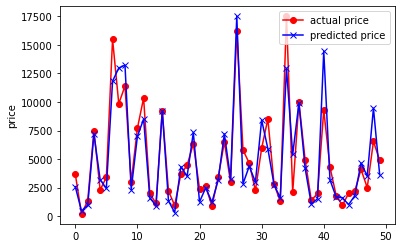

In [41]:
import random
num_samples=50
idx=random.sample(range(len(y_test)),num_samples) 
plt.plot(range(num_samples),y_test[idx],'ro-')
plt.plot(range(num_samples),y_pred[idx],'bx-')
plt.ylabel("price")
plt.legend(["actual price",'predicted price','mean price'])

In [42]:
x_train[0]

array([ 0.36326628, -0.36326628,  3.28503351, -0.34662838, -0.06955563,
       -0.06460935, -0.1238794 , -0.05510891, -0.03813088, -0.04673981,
       -0.16367964, -0.27544652, -0.09038403, -0.10797302, -0.03374592,
       -0.04351878, -0.08926093, -0.02328419, -0.03536573, -0.03893833,
       -0.12949168, -0.31501407, -0.10519435, -0.0925907 , -0.12016085,
       -0.34958584, -0.18583037, -0.03300061, -0.2265546 , -0.03405167,
       -0.04055645, -0.14398062, -0.13621457, -0.11973505, -0.06550701,
       -0.04566085, -0.08427656, -0.12348295, -0.02415706, -0.5200659 ,
       -0.10009145, -1.39270141, -0.04375666,  1.4522443 , -0.01652491,
       -0.0283389 , -0.12437759, -0.49027273,  0.49027273, -0.33033017,
       -0.26217687, -0.21711208, -0.57505767, -0.51579471,  1.5688466 ,
       -0.19677395, -1.12926496,  1.11329684,  0.60459088,  1.67134267])

In [43]:
import pickle
#saving the model
filename  = 'vehicleresaleprice.pkl'
scalerFile= 'scaler.pkl'
rf=RandomForestRegressor(n_estimators=20,criterion='mse',random_state=1)
pickle.dump(rf, open(filename, 'wb'))
pickle.dump(sc, open(scalerFile, 'wb'))

## Observation:

|Algorithm                |Accuracy             |Accuracy in %
|-------------------------|---------------------|--------------
|Multi Linear Regression  | 0.7132389211953192  | 71.3%
|Decision Tree Regressor  | 0.8011791920592324  | 80.1%
|Random Forest Regressor  | 0.8681639422469312  | 86.8%